# Rozpoznawanie cyfr alfabetu migowego z wykorzystaniem uczenia maszynowego

Import niezbędnych bibliotek

In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from datetime import datetime

Klonowanie repozytorium z setem zdjęć 

In [3]:
!git clone https://github.com/ardamavi/Sign-Language-Digits-Dataset

Cloning into 'Sign-Language-Digits-Dataset'...
remote: Enumerating objects: 2095, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2095 (delta 2), reused 0 (delta 0), pack-reused 2089
Receiving objects: 100% (2095/2095), 15.07 MiB | 30.02 MiB/s, done.
Resolving deltas: 100% (660/660), done.


Wypisanie zawartości repozytorium

In [4]:
path = 'Sign-Language-Digits-Dataset'
print('Repozytorium: {}'.format(os.listdir(os.path.join(path))))
print('Dataset: {}'.format(os.listdir(os.path.join(path)+'/Dataset')))
print('Examples: {}'.format(os.listdir(os.path.join(path)+'/Examples')))

Repozytorium: ['Dataset', 'README.md', 'LICENSE', '.git', 'Examples']
Dataset: ['4', '6', '1', '2', '9', '8', '0', '7', '3', '5']
Examples: ['example_8.JPG', 'example_3.JPG', 'example_7.JPG', 'example_9.JPG', 'example_5.JPG', 'example_0.JPG', 'example_6.JPG', 'example_1.JPG', 'example_2.JPG', 'example_4.JPG']


Katalog Dataset zawiera zbiór danych treningowych (około 200 zdjęć każdej z cyfr), natomiast Examples - dane testowe (po jednym dla każdej z cyfr)

In [5]:
for i in os.listdir(os.path.join(path)+'/Dataset'):
  print('{}: {} zdjęć'.format(i, len(os.listdir(os.path.join(path)+'/Dataset/'+i))), end=', ')

4: 207 zdjęć, 6: 207 zdjęć, 1: 206 zdjęć, 2: 206 zdjęć, 9: 204 zdjęć, 8: 208 zdjęć, 0: 205 zdjęć, 7: 206 zdjęć, 3: 206 zdjęć, 5: 207 zdjęć, 

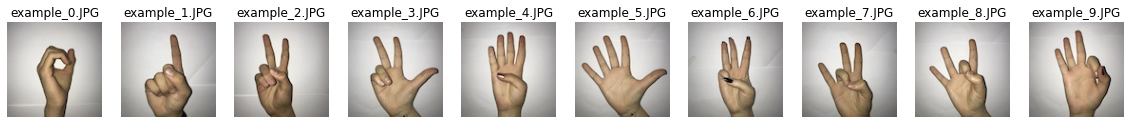

In [6]:
path_ex = 'Sign-Language-Digits-Dataset/Examples'
ex_im = os.listdir(os.path.join(path_ex))
ex_im.sort()

test_images = []
for im in ex_im:
  test_images.append(plt.imread(os.path.join(path_ex)+'/'+im))

plt.figure(figsize=(20, 20))
for i in range(10):
  ax = plt.subplot(1, 10, i + 1)
  plt.imshow(test_images[i])
  plt.title(ex_im[i])
  plt.axis("off")

In [7]:
ds_dir = os.path.join(path+'/Dataset')

train_ds = tf.keras.utils.image_dataset_from_directory(
    ds_dir,
    validation_split = 0.2,
    subset="training",
    seed=123456,
    batch_size=128,
    image_size=(100,100),
    shuffle=True)

val_ds = tf.keras.utils.image_dataset_from_directory(
    ds_dir,
    validation_split = 0.2,
    subset="validation",
    seed=123456,
    image_size=(100,100))

Found 2062 files belonging to 10 classes.
Using 1650 files for training.
Found 2062 files belonging to 10 classes.
Using 412 files for validation.


Każdy z obrazków jest de facto macierzą trójwymiarową - 100 x 100 x 3, gdzie 100 x 100 to rozdzielczość zdjęć a 3 - liczba warstw, odpowiadających za nasycenie poszczególnego piksela każdą z trzech barw podstawowych - czerwoną, zieloną oraz niebieską.

In [8]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Budowa sieci o trzech warstwach

In [9]:
model_basic = tf.keras.Sequential([
    # zamiana warości nasycenia kolorami do zakresu 0-1
    tf.keras.layers.Rescaling(1./255),
    # piewsza warstwa konwolucyjna, funkcja aktywacji ReLU
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # druga warstwa konwolucyjna
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # trzecia warstwa konwolucyjna
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    # warstwa "gęsta"
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(train_ds.class_names))
    ])



In [10]:
model_basic.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [11]:
now = datetime.now()
time = now.strftime("%H:%M:%S")
print('Start time: {}'.format(time))
history_basic = model_basic.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    verbose=2 
)
now = datetime.now()
time = now.strftime("%H:%M:%S")
print('End time: {}'.format(time))

Start time: 20:39:26
Epoch 1/100
13/13 - 23s - loss: 2.2989 - accuracy: 0.1352 - val_loss: 2.2905 - val_accuracy: 0.1723 - 23s/epoch - 2s/step
Epoch 2/100
13/13 - 22s - loss: 2.2781 - accuracy: 0.2297 - val_loss: 2.2687 - val_accuracy: 0.2961 - 22s/epoch - 2s/step
Epoch 3/100
13/13 - 22s - loss: 2.2432 - accuracy: 0.3842 - val_loss: 2.2217 - val_accuracy: 0.4102 - 22s/epoch - 2s/step
Epoch 4/100
13/13 - 22s - loss: 2.1774 - accuracy: 0.4436 - val_loss: 2.1300 - val_accuracy: 0.5413 - 22s/epoch - 2s/step
Epoch 5/100
13/13 - 22s - loss: 2.0527 - accuracy: 0.5667 - val_loss: 1.9692 - val_accuracy: 0.6068 - 22s/epoch - 2s/step
Epoch 6/100
13/13 - 24s - loss: 1.8526 - accuracy: 0.6424 - val_loss: 1.7238 - val_accuracy: 0.6481 - 24s/epoch - 2s/step
Epoch 7/100
13/13 - 22s - loss: 1.5794 - accuracy: 0.6806 - val_loss: 1.4351 - val_accuracy: 0.6748 - 22s/epoch - 2s/step
Epoch 8/100
13/13 - 22s - loss: 1.2926 - accuracy: 0.7048 - val_loss: 1.1704 - val_accuracy: 0.7039 - 22s/epoch - 2s/step
Epo

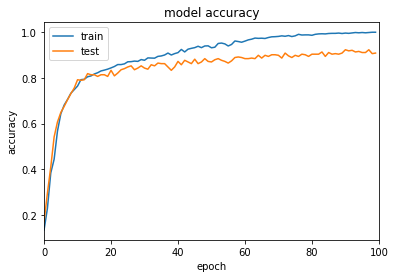

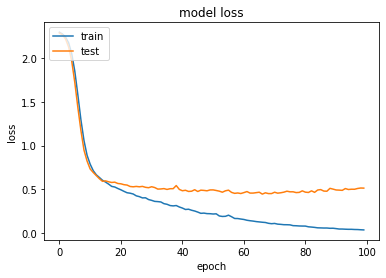

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        9

In [12]:
# plotting the traing for accuracy and loss
plt.plot(history_basic.history['accuracy'])
plt.plot(history_basic.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim(0, 100)
plt.show()

plt.plot(history_basic.history['loss'])
plt.plot(history_basic.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# model summary
model_basic.summary()


In [13]:
BENCHMARK_ERROR = .12
BENCHMARK_ACCURACY = 1 - BENCHMARK_ERROR

accuracy = history_basic.history['accuracy']
val_accuracy = history_basic.history['val_accuracy']
loss = history_basic.history['loss']
val_loss = history_basic.history['val_loss']
    
assert(accuracy[-1] > BENCHMARK_ACCURACY)
assert(val_accuracy[-1] > BENCHMARK_ACCURACY)
print("Test to beat benchmark accuracy passed!")
        
assert(accuracy[0] < accuracy[1])
assert(accuracy[1] < accuracy[-1])
assert(val_accuracy[0] < val_accuracy[1])
assert(val_accuracy[1] < val_accuracy[-1])
print("Test model accuracy is improving passed!")
    
assert(loss[0] > loss[1])
assert(loss[1] > loss[-1])
assert(val_loss[0] > val_loss[1])
assert(val_loss[1] > val_loss[-1])
print("Test loss is decreasing passed!")

Test to beat benchmark accuracy passed!
Test model accuracy is improving passed!
Test loss is decreasing passed!
